<a href="https://colab.research.google.com/github/DannyRea/Covid-19-Vaccine-Symptom-Tracker/blob/main/CovidVaccineSymptomTracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np  
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.cm as cm
from matplotlib import pyplot as plt
%matplotlib inline
from google.colab import drive
from google.colab import files
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df_vax = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2021VAERSVAX.csv')
df_sym  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2021VAERSSYMPTOMS.csv')
df_data  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2021VAERSDATA.csv', encoding = 'Windows-1252')

In [ ]:
df_vax['VAX_MANU'] = df_vax['VAX_MANU'].str.replace('\\','/')
df_vax['VAX_MANU'] = df_vax['VAX_MANU'].str.lower()
df_vax = df_vax.dropna()
df_vax.shape
df_vax.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
1,916720,COVID19,moderna,011L20A,1,IM,AR,COVID19 (COVID19 (MODERNA))
2,916741,COVID19,pfizer/biontech,EH9899,1,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916772,COVID19,pfizer/biontech,EJ1685,UNK,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
6,916809,COVID19,pfizer/biontech,EK5730,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH))
7,916836,COVID19,moderna,025J20A,1,IM,AR,COVID19 (COVID19 (MODERNA))


In [ ]:
df_sym = df_sym.dropna()
df_sym.shape
df_sym.head()


,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
2,916741,Chills,23.1,Complex regional pain syndrome,23.1,Fatigue,23.1,Headache,23.1,Joint range of motion decreased,23.1
5,916790,Blood pressure diastolic increased,23.1,Blood pressure systolic increased,23.1,Chest discomfort,23.1,Dizziness,23.1,Dysphagia,23.1
6,916790,Electrocardiogram,23.1,Flushing,23.1,Heart rate increased,23.1,Hyperhidrosis,23.1,Malaise,23.1
9,916809,Blepharospasm,23.1,Chest discomfort,23.1,Computerised tomogram,23.1,Dizziness,23.1,Dyspnoea,23.1
11,916836,Chest X-ray abnormal,23.1,Chest discomfort,23.1,Computerised tomogram thorax abnormal,23.1,Coronary artery disease,23.1,Diarrhoea,23.1


In [ ]:

df_data.shape
df_data.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916710,01/01/2021,MO,23.0,23.0,NaN,F,NaN,"Acute appendicitis, onset morning of 1/1/2021 ...",NaN,NaN,Y,NaN,Y,NaN,NaN,NaN,U,12/29/2020,01/01/2021,3.0,"WBCs 13k, 4% Bands, CT with acute appendicitis...",PVT,NaN,Synthroid,NaN,Hypothyroidism,NaN,NaN,2,01/01/2021,NaN,NaN,Y,NKDA
1,916720,01/01/2021,NY,23.0,23.0,NaN,M,NaN,Patient made statements that he was having a h...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/31/2020,12/31/2020,0.0,NaN,PVT,NaN,NaN,NaN,NaN,unknown,NaN,2,01/01/2021,NaN,NaN,Y,NaN
2,916741,01/01/2021,AR,68.0,68.0,NaN,F,NaN,"on dec 22 I felt some myalgias, chills, fatigu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,N,12/21/2020,12/22/2020,1.0,Dec 29th - saw surgeon. had xray and exam --d...,PVT,NaN,phenobarbital 60mg HS hydroxychloroquin 400mg...,had surgery R hand for advanced arthritis 11/1...,Rheumatoid arthritis - mostly affecting R wris...,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,bee stings
3,916772,01/01/2021,GA,55.0,55.0,NaN,M,NaN,Vaccine on 12/22/2020 and started feeling bad ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,12/22/2020,12/26/2020,4.0,Tested positive for COVID 19 on 12/30/2020,PUB,NaN,"Propranolol,zoloft,asa,Lisinipril, Crestor, Pr...",NaN,"HTN, Insomnia,High Cholesterol,",NaN,NaN,2,01/01/2021,NaN,Y,NaN,Codeine
4,916790,01/01/2021,TN,52.0,52.0,NaN,F,NaN,"Flushing, sweating, increased heart rate proce...",NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,U,12/26/2020,12/26/2020,0.0,"Solu-Medrol, Benadryl IV, Pepcid IV, and EKG m...",PVT,NaN,"Estradiol, topiramate, Emgality, sumatriptan, ...",NaN,"Asthma, migraines",NaN,NaN,2,01/01/2021,NaN,NaN,Y,"Sulfa, shellfish"


In [ ]:
cols_to_summarize = [
                     'symptom1', 
                     'symptom2', 
                     'symptom3', 
                     'symptom4', 
                     'symptom5']

df_sym.drop_duplicates().set_index('VAERS_ID')

df_sym.drop(columns=['SYMPTOMVERSION1','SYMPTOMVERSION2','SYMPTOMVERSION3','SYMPTOMVERSION4','SYMPTOMVERSION5'], axis=1,inplace=True)

df_data.drop_duplicates()

df_vax.drop_duplicates()

merged_df = pd.merge(df_sym, df_data)

complete_df = pd.merge(merged_df, df_vax)

vax = df_vax['VAX_MANU']

complete_df.drop(labels=['VAX_MANU'], axis=1,inplace = True)

complete_df.insert(1, 'VAX_MANU', vax)


complete_df.head()

,VAERS_ID,VAX_MANU,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916741,NaN,Chills,Complex regional pain syndrome,Fatigue,Headache,Joint range of motion decreased,01/01/2021,AR,68.0,68.0,NaN,F,NaN,"on dec 22 I felt some myalgias, chills, fatigu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,N,12/21/2020,12/22/2020,1.0,Dec 29th - saw surgeon. had xray and exam --d...,PVT,NaN,phenobarbital 60mg HS hydroxychloroquin 400mg...,had surgery R hand for advanced arthritis 11/1...,Rheumatoid arthritis - mostly affecting R wris...,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,bee stings,COVID19,EH9899,1,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
1,916809,moderna,Blepharospasm,Chest discomfort,Computerised tomogram,Dizziness,Dyspnoea,01/01/2021,WA,40.0,40.0,NaN,F,NaN,CAREGIVER RECEIVED FIRST VACCINE DOSE AND SOON...,NaN,NaN,NaN,NaN,Y,9.0,NaN,NaN,U,12/23/2020,12/23/2020,0.0,12/28/2020 CT SCAN 12/28/2020 PULMONOLOGY CONSULT,PVT,NaN,NaN,None,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,Y,None,COVID19,EK5730,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH))
2,916836,pfizer/biontech,Chest X-ray abnormal,Chest discomfort,Computerised tomogram thorax abnormal,Coronary artery disease,Diarrhoea,01/01/2021,MD,55.0,55.0,NaN,M,NaN,Patient is a 55 year old male with no past med...,NaN,NaN,NaN,NaN,Y,1.0,NaN,NaN,Y,12/24/2020,12/30/2020,6.0,SARS-CoV-2 RNA - Detected A 12/30/2020 @1825,PVT,NaN,No current medications,Pt reported frequent urination for several months,None,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,No known allergies,COVID19,025J20A,1,IM,AR,COVID19 (COVID19 (MODERNA))
3,916836,pfizer/biontech,Discomfort,Echocardiogram normal,Ejection fraction normal,Electrocardiogram Q wave abnormal,Electrocardiogram abnormal,01/01/2021,MD,55.0,55.0,NaN,M,NaN,Patient is a 55 year old male with no past med...,NaN,NaN,NaN,NaN,Y,1.0,NaN,NaN,Y,12/24/2020,12/30/2020,6.0,SARS-CoV-2 RNA - Detected A 12/30/2020 @1825,PVT,NaN,No current medications,Pt reported frequent urination for several months,None,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,No known allergies,COVID19,025J20A,1,IM,AR,COVID19 (COVID19 (MODERNA))
4,916836,NaN,Electrocardiogram change,Epistaxis,Fatigue,Fibrin D dimer normal,Flushing,01/01/2021,MD,55.0,55.0,NaN,M,NaN,Patient is a 55 year old male with no past med...,NaN,NaN,NaN,NaN,Y,1.0,NaN,NaN,Y,12/24/2020,12/30/2020,6.0,SARS-CoV-2 RNA - Detected A 12/30/2020 @1825,PVT,NaN,No current medications,Pt reported frequent urination for several months,None,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,No known allergies,COVID19,025J20A,1,IM,AR,COVID19 (COVID19 (MODERNA))


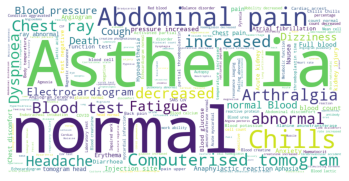

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(' '.join(complete_df['SYMPTOM1']))


plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [ ]:
words = []
counts = []
counted_words = collections.Counter(complete_df['SYMPTOM1'])

for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)



<BarContainer object of 10 artists>

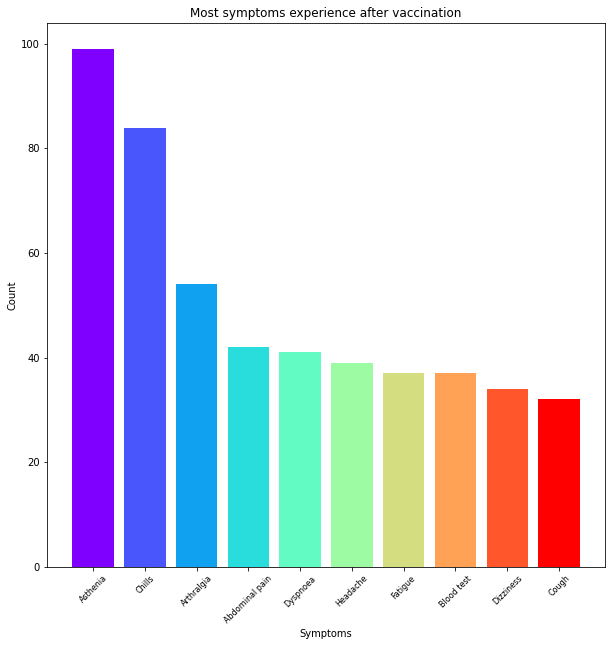

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, 10))
fig, ax = plt.subplots(figsize=(10, 10))

plt.title('Most symptoms experienced after vaccination')

ax.set_xticklabels(words, fontsize=8)
ax.set_xticklabels(words, rotation=45)
plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.bar(words, counts, color=colors)